## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [16]:
import pandas as pd
df=pd.read_csv("Indices_Exercise_Data.csv" )
df=df[df["Date"] > '2000-1-1']
df.head()

,Date,DJI,GSPC,IXIC
41,3/1/2000,10137.929690,1379.189941,4784.080078
42,3/2/2000,10164.919920,1381.760010,4754.509766
43,3/3/2000,10367.200200,1409.170044,4914.790039
44,3/6/2000,10170.500000,1391.280029,4904.850098
45,3/7/2000,9796.030273,1355.619995,4847.839844


Normalize the data to 100 and plot the results on a graph. 

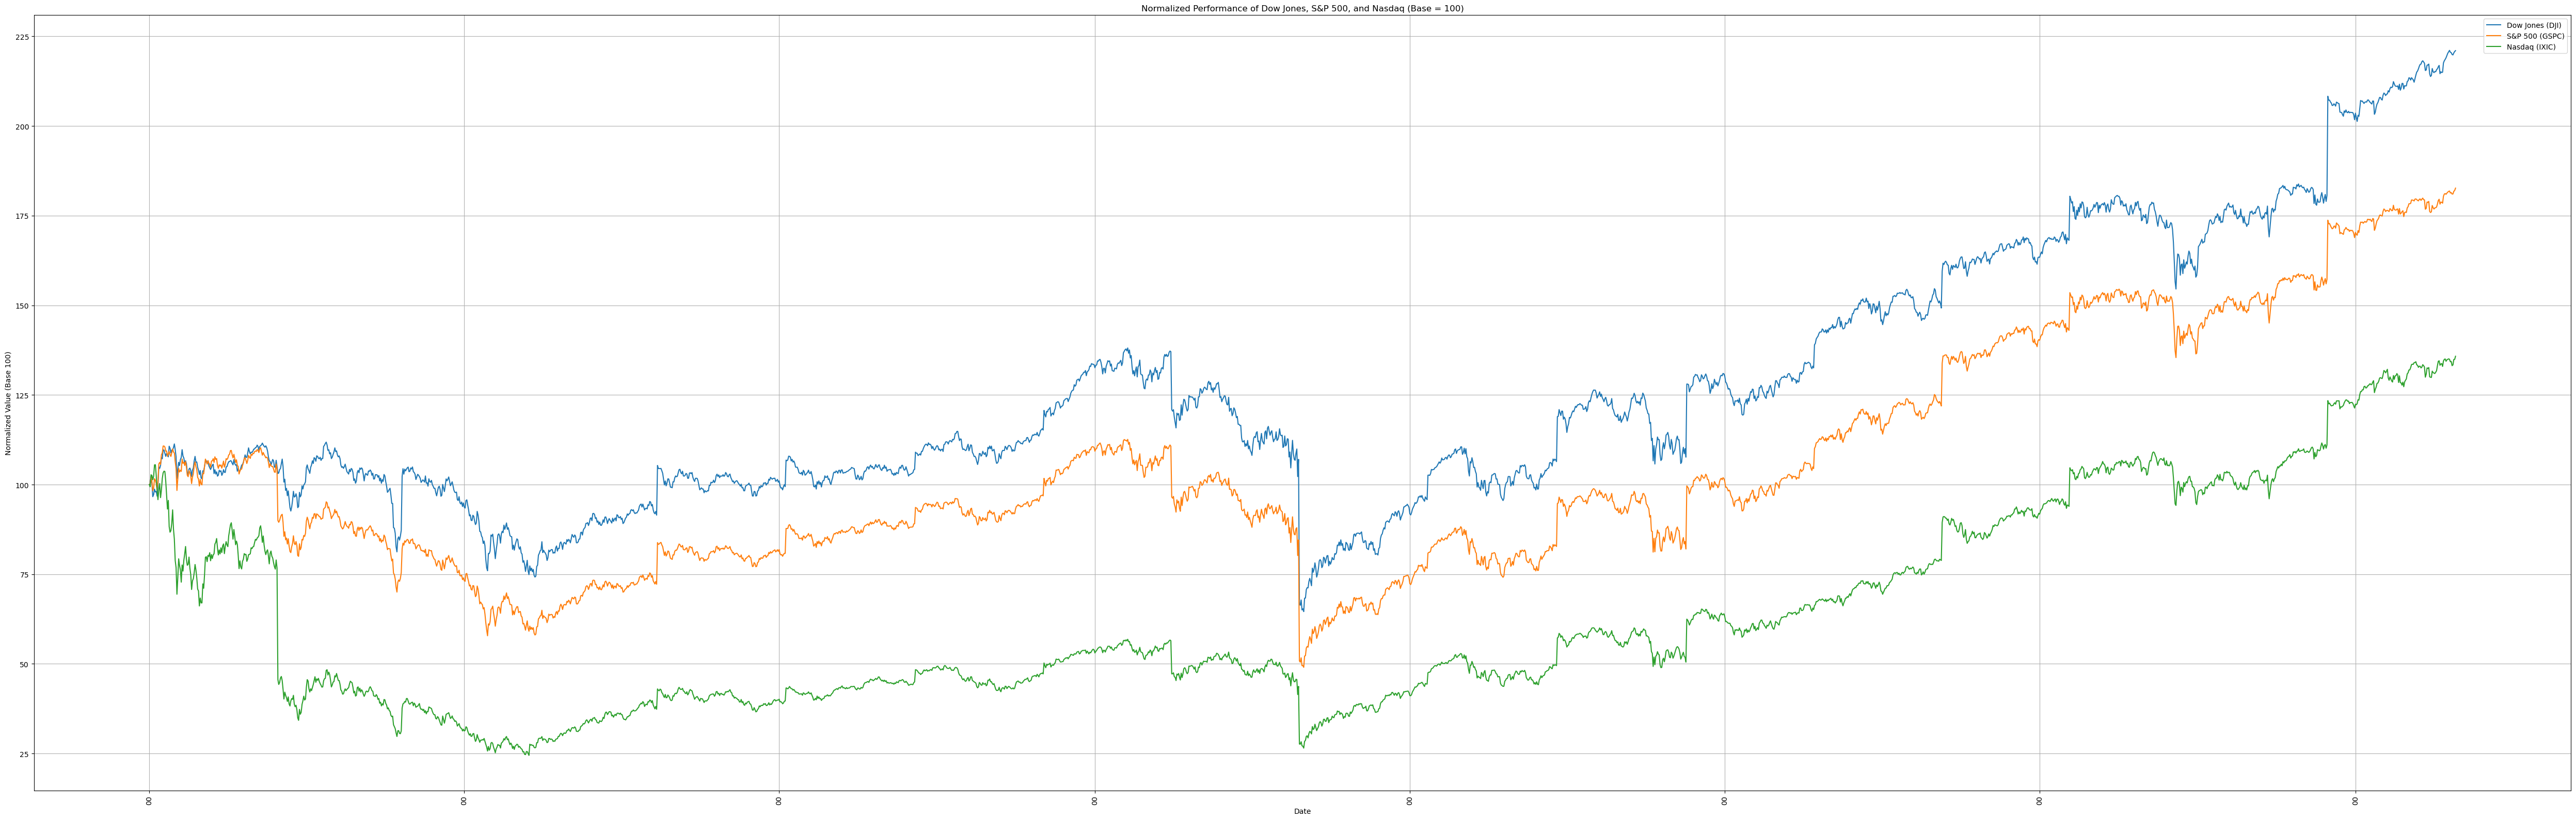

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df['DJI_norm'] = df['DJI'] / df['DJI'].iloc[0] * 100
df['GSPC_norm'] = df['GSPC'] / df['GSPC'].iloc[0] * 100
df['IXIC_norm'] = df['IXIC'] / df['IXIC'].iloc[0] * 100

plt.figure(figsize=(50,16))
plt.plot(df['Date'], df['DJI_norm'], label='Dow Jones (DJI)')
plt.plot(df['Date'], df['GSPC_norm'], label='S&P 500 (GSPC)')
plt.plot(df['Date'], df['IXIC_norm'], label='Nasdaq (IXIC)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
plt.title('Normalized Performance of Dow Jones, S&P 500, and Nasdaq (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Value (Base 100)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

How would you explain the common and the different parts of the behavior of the three indices?

1. Điểm chung của ba chỉ số
Cùng xu hướng tăng dài hạn

Tất cả đều tăng trưởng mạnh mẽ so với năm 2000, dù có nhiều giai đoạn suy giảm ngắn hạn.

Điều này phản ánh nền kinh tế Mỹ nhìn chung vẫn mở rộng liên tục trong hơn hai thập kỷ qua.

Cùng phản ứng với các cú sốc kinh tế toàn cầu

Các “vết lõm” (điểm rơi mạnh) xuất hiện đồng thời ở cả ba chỉ số, thường gắn với các khủng hoảng lớn:

Giai đoạn	Nguyên nhân	Ảnh hưởng
2000–2002	Bong bóng Dot-com	Nasdaq giảm mạnh nhất (vì nhiều cổ phiếu công nghệ sụp đổ).
2008–2009	Khủng hoảng tài chính toàn cầu (Lehman Brothers)	Cả ba chỉ số đều giảm sâu.
2020	COVID-19 Pandemic	Sụt giảm đột ngột rồi phục hồi mạnh nhờ chính sách kích thích.

=> Cả ba đều thể hiện tính chu kỳ của nền kinh tế: tăng trưởng – suy thoái – phục hồi.

2. Điểm khác nhau giữa các chỉ số
Nasdaq:

Biến động mạnh vì tập trung công nghệ.

Tăng trưởng cao nhất giai đoạn sau 2010 nhờ “big tech boom”.

S&P 500:

Ổn định hơn Nasdaq, nhưng vẫn phản ánh sức khỏe chung của nền kinh tế.

Được xem là “chuẩn mực” (benchmark) cho toàn bộ thị trường chứng khoán Mỹ.

Dow Jones:

Ít biến động nhất, vì bao gồm các công ty “blue-chip” lâu đời.

Tăng ổn định nhưng chậm hơn hai chỉ số kia trong dài hạn.

3. Kết luận tổng quát

Tương đồng: Cả ba chỉ số cùng chuyển động theo hướng dài hạn của nền kinh tế Mỹ, chịu ảnh hưởng từ các chu kỳ kinh tế và biến cố toàn cầu.

Khác biệt: Nasdaq là nhạy cảm nhất và tăng trưởng mạnh nhất, trong khi Dow Jones ổn định và ít rủi ro hơn, còn S&P 500 nằm giữa hai thái cực này.

*****

Obtain the simple returns of the indices.

In [22]:
df['DJI_simple_return'] = df['DJI'].pct_change()
df['GSPC_simple_return'] = df['GSPC'].pct_change()
df['IXIC_simple_return'] = df['IXIC'].pct_change()
print(df[['Date', 'DJI_simple_return', 'GSPC_simple_return', 'IXIC_simple_return']].head())

        Date  DJI_simple_return  GSPC_simple_return  IXIC_simple_return
41  3/1/2000                NaN                 NaN                 NaN
42  3/2/2000           0.002662            0.001863           -0.006181
43  3/3/2000           0.019900            0.019837            0.033711
44  3/6/2000          -0.018973           -0.012695           -0.002022
45  3/7/2000          -0.036819           -0.025631           -0.011623


Estimate the average annual return of each index.

In [25]:
avg_annual_returns = pd.DataFrame({
    'Dow Jones': [df['DJI_simple_return'].mean() * 250],
    'S&P 500': [df['GSPC_simple_return'].mean() * 250],
    'Nasdaq': [df['IXIC_simple_return'].mean() * 250]
})

avg_annual_returns.T.columns = ['Average Annual Return']
print(avg_annual_returns.T)

                  0
Dow Jones  0.105142
S&P 500    0.091173
Nasdaq     0.088438
